Hola **Ricardo**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [60]:
# Cargar todas las librerías
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns  


## Cargar datos

In [61]:
# Carga los archivos de datos en diferentes DataFrames
df_call = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo realizando la importación de librerías y carga de datos en celdas separadas, esto ayuda a que la lectura y seguimiento del notebook sea más amigable
</div>

## Preparar los datos

## Tarifas

In [62]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(df_plans.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [63]:
# Imprime una muestra de los datos para las tarifas
print(df_plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Se necesita cambiar de MB a GB en la columna mb_per_month_incluided


## Corregir datos

## Enriquecer los datos

In [64]:
df_plans["gb_per_month_included"] = df_plans["mb_per_month_included"] / 1024
df_plans.drop(columns=["mb_per_month_included"], inplace=True)

print(df_plans)

   messages_included  minutes_included  usd_monthly_pay  usd_per_gb  \
0                 50               500               20          10   
1               1000              3000               70           7   

   usd_per_message  usd_per_minute plan_name  gb_per_month_included  
0             0.03            0.03      surf                   15.0  
1             0.01            0.01  ultimate                   30.0  


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te recomiendo en esta sección hacer la transformación de mb a gb de la columna mb_per_month_included ya que el resto esta en función de GB y no de mb.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto, procura siempre adecuar tus datos para tenerlos en una sola unidad de medida
</div>

## Usuarios/as

In [65]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(df_users.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [66]:
# Imprime una muestra de datos para usuarios
print(df_users.head(25))


    user_id first_name  last_name  age  \
0      1000   Anamaria      Bauer   45   
1      1001     Mickey  Wilkerson   28   
2      1002     Carlee    Hoffman   36   
3      1003   Reynaldo    Jenkins   52   
4      1004    Leonila   Thompson   40   
5      1005      Livia    Shields   31   
6      1006     Jesusa   Bradford   73   
7      1007    Eusebio      Welch   42   
8      1008      Emely    Hoffman   53   
9      1009      Gerry     Little   19   
10     1010     Wilber      Blair   52   
11     1011     Halina      Henry   73   
12     1012    Jonelle    Mcbride   59   
13     1013    Nicolas     Snider   50   
14     1014    Edmundo      Simon   61   
15     1015      Beata  Carpenter   26   
16     1016       Jann    Salinas   30   
17     1017      Boris      Gates   61   
18     1018     Dennis     Grimes   70   
19     1019     Shizue     Landry   34   
20     1020      Rutha       Bell   56   
21     1021    Ricarda     Booker   37   
22     1022         Bo       Snow 

Aqui podemos observar que las columnas reg_date y churn_dat estan en object lo cual se puede pasar a formato datetime, esto convertirá los valores en fechas y reemplazará cualquier valor no válido con NaT (not a time).

### Corregir los datos

In [67]:
df_users["reg_date"] = pd.to_datetime(df_users["reg_date"], errors="coerce")
df_users["churn_date"] = pd.to_datetime(df_users["churn_date"], errors="coerce")
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


### Enriquecer los datos

## Llamadas

In [68]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(df_call.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [69]:
# Imprime una muestra de datos para las llamadas
print(df_call)


              id  user_id   call_date  duration
0        1000_93     1000  2018-12-27      8.52
1       1000_145     1000  2018-12-27     13.66
2       1000_247     1000  2018-12-27     14.48
3       1000_309     1000  2018-12-28      5.76
4       1000_380     1000  2018-12-30      4.22
...          ...      ...         ...       ...
137730  1499_199     1499  2018-11-21      8.72
137731  1499_200     1499  2018-10-20     10.89
137732  1499_201     1499  2018-09-21      8.12
137733  1499_202     1499  2018-10-10      0.37
137734  1499_203     1499  2018-12-29     13.86

[137735 rows x 4 columns]


La columna call_date esta en formato object sería ideal convertir esta columna a tipo datetime para facilitar cualquier operación o análisis relacionado con fechas.

### Corregir los datos

In [70]:
df_call["call_date"] = pd.to_datetime(df_call["call_date"], errors="coerce")
print(df_call.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


### Enriquecer los datos

In [71]:
# Supongamos que ya tienes tu DataFrame cargado
df_call["duration"] = np.ceil(df_call["duration"])
print(df_call.head())

         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27       9.0
1  1000_145     1000 2018-12-27      14.0
2  1000_247     1000 2018-12-27      15.0
3  1000_309     1000 2018-12-28       6.0
4  1000_380     1000 2018-12-30       5.0


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para seguir las reglas de negocio de la empresa se debería aplicar un redondeo hacia arriba de la columna `duration` ya que se menciona que la empresa cobra cómo completo cada fracción de minuto. Esto lo puedes hacer usando `np.ceil`
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, con ese ajuste se sigue mejor las reglas de negocio con las que trabaja la empresa
</div>

## Mensajes

In [72]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(df_messages.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [73]:
# Imprime una muestra de datos para los mensajes

print(df_messages)

             id  user_id message_date
0      1000_125     1000   2018-12-27
1      1000_160     1000   2018-12-31
2      1000_223     1000   2018-12-31
3      1000_251     1000   2018-12-27
4      1000_255     1000   2018-12-26
...         ...      ...          ...
76046  1497_526     1497   2018-12-24
76047  1497_536     1497   2018-12-24
76048  1497_547     1497   2018-12-31
76049  1497_558     1497   2018-12-24
76050  1497_613     1497   2018-12-23

[76051 rows x 3 columns]


La columna message_date está como object, pero debería ser de tipo datetime, se aplicara lo mismo que a los datasets anteriores.
Esto asegurará que las fechas estén en el formato adecuado para cualquier operación o filtrado basado en fechas

### Corregir los datos

In [74]:
df_messages["message_date"] = pd.to_datetime(df_messages["message_date"], errors="coerce")
print(df_messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


### Enriquecer los datos

## Internet

In [75]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(df_internet.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [76]:
# Imprime una muestra de datos para el tráfico de internet
print(df_internet)


              id  user_id session_date  mb_used
0        1000_13     1000   2018-12-29    89.86
1       1000_204     1000   2018-12-31     0.00
2       1000_379     1000   2018-12-28   660.40
3       1000_413     1000   2018-12-26   270.99
4       1000_442     1000   2018-12-27   880.22
...          ...      ...          ...      ...
104820  1499_215     1499   2018-10-20   218.06
104821  1499_216     1499   2018-12-30   304.72
104822  1499_217     1499   2018-09-22   292.75
104823  1499_218     1499   2018-12-07     0.00
104824  1499_219     1499   2018-12-24   758.31

[104825 rows x 4 columns]


La columna session_date esta como object, pero debería ser de tipo datetime, se aplicara lo mismo que a los datasets anteriores.

### Corregir los datos

In [77]:
df_internet["session_date"] = pd.to_datetime(df_internet["session_date"], errors="coerce")
print(df_internet.info()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


### Enriquecer los datos

## Estudiar las condiciones de las tarifas

In [78]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(df_plans)


   messages_included  minutes_included  usd_monthly_pay  usd_per_gb  \
0                 50               500               20          10   
1               1000              3000               70           7   

   usd_per_message  usd_per_minute plan_name  gb_per_month_included  
0             0.03            0.03      surf                   15.0  
1             0.01            0.01  ultimate                   30.0  


## Agregar datos por usuario



In [79]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_call["year_month"] = df_call["call_date"].dt.to_period("M")
calls_per_user_month = df_call.groupby(["user_id", "year_month"]).size().reset_index(name="num_calls")

for user in calls_per_user_month["user_id"].unique():
    user_data = calls_per_user_month[calls_per_user_month["user_id"] == user]
    print(f"Usuario {user}:")
    for _, row in user_data.iterrows():
        print(f"  - {row['year_month']}: {row['num_calls']} llamadas")
    print("-" * 30)

Usuario 1000:
  - 2018-12: 16 llamadas
------------------------------
Usuario 1001:
  - 2018-08: 27 llamadas
  - 2018-09: 49 llamadas
  - 2018-10: 65 llamadas
  - 2018-11: 64 llamadas
  - 2018-12: 56 llamadas
------------------------------
Usuario 1002:
  - 2018-10: 11 llamadas
  - 2018-11: 55 llamadas
  - 2018-12: 47 llamadas
------------------------------
Usuario 1003:
  - 2018-12: 149 llamadas
------------------------------
Usuario 1004:
  - 2018-05: 21 llamadas
  - 2018-06: 44 llamadas
  - 2018-07: 49 llamadas
  - 2018-08: 49 llamadas
  - 2018-09: 42 llamadas
  - 2018-10: 61 llamadas
  - 2018-11: 54 llamadas
  - 2018-12: 50 llamadas
------------------------------
Usuario 1005:
  - 2018-12: 59 llamadas
------------------------------
Usuario 1006:
  - 2018-11: 2 llamadas
  - 2018-12: 9 llamadas
------------------------------
Usuario 1007:
  - 2018-08: 70 llamadas
  - 2018-09: 63 llamadas
  - 2018-10: 80 llamadas
  - 2018-11: 80 llamadas
  - 2018-12: 87 llamadas
----------------------

In [80]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_user_month = df_call.groupby(["user_id", "year_month"])["duration"].sum().reset_index(name="total_minutes")

for user in minutes_per_user_month["user_id"].unique():
    user_data = minutes_per_user_month[minutes_per_user_month["user_id"] == user]
    print(f" Usuario {user}:")
    for _, row in user_data.iterrows():
        print(f"  - {row['year_month']}: {row['total_minutes']:.2f} minutos")
    print("-" * 30) 


 Usuario 1000:
  - 2018-12: 124.00 minutos
------------------------------
 Usuario 1001:
  - 2018-08: 182.00 minutos
  - 2018-09: 315.00 minutos
  - 2018-10: 393.00 minutos
  - 2018-11: 426.00 minutos
  - 2018-12: 412.00 minutos
------------------------------
 Usuario 1002:
  - 2018-10: 59.00 minutos
  - 2018-11: 386.00 minutos
  - 2018-12: 384.00 minutos
------------------------------
 Usuario 1003:
  - 2018-12: 1104.00 minutos
------------------------------
 Usuario 1004:
  - 2018-05: 193.00 minutos
  - 2018-06: 275.00 minutos
  - 2018-07: 381.00 minutos
  - 2018-08: 354.00 minutos
  - 2018-09: 301.00 minutos
  - 2018-10: 365.00 minutos
  - 2018-11: 476.00 minutos
  - 2018-12: 427.00 minutos
------------------------------
 Usuario 1005:
  - 2018-12: 496.00 minutos
------------------------------
 Usuario 1006:
  - 2018-11: 10.00 minutos
  - 2018-12: 59.00 minutos
------------------------------
 Usuario 1007:
  - 2018-08: 456.00 minutos
  - 2018-09: 399.00 minutos
  - 2018-10: 645.00 m

In [81]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
df_messages["year_month"] = df_messages["message_date"].dt.to_period("M")
messages_per_user_month = df_messages.groupby(["user_id", "year_month"]).size().reset_index(name="num_messages")

for user in messages_per_user_month["user_id"].unique():
    user_data = messages_per_user_month[messages_per_user_month["user_id"] == user]
    print(f" Usuario {user}:")
    for _, row in user_data.iterrows():
        print(f"  - {row['year_month']}: {row['num_messages']} mensajes")
    print("-" * 30)

 Usuario 1000:
  - 2018-12: 11 mensajes
------------------------------
 Usuario 1001:
  - 2018-08: 30 mensajes
  - 2018-09: 44 mensajes
  - 2018-10: 53 mensajes
  - 2018-11: 36 mensajes
  - 2018-12: 44 mensajes
------------------------------
 Usuario 1002:
  - 2018-10: 15 mensajes
  - 2018-11: 32 mensajes
  - 2018-12: 41 mensajes
------------------------------
 Usuario 1003:
  - 2018-12: 50 mensajes
------------------------------
 Usuario 1004:
  - 2018-05: 7 mensajes
  - 2018-06: 18 mensajes
  - 2018-07: 26 mensajes
  - 2018-08: 25 mensajes
  - 2018-09: 21 mensajes
  - 2018-10: 24 mensajes
  - 2018-11: 25 mensajes
  - 2018-12: 31 mensajes
------------------------------
 Usuario 1005:
  - 2018-12: 11 mensajes
------------------------------
 Usuario 1006:
  - 2018-11: 15 mensajes
  - 2018-12: 139 mensajes
------------------------------
 Usuario 1007:
  - 2018-08: 51 mensajes
  - 2018-09: 47 mensajes
  - 2018-10: 59 mensajes
  - 2018-11: 48 mensajes
  - 2018-12: 50 mensajes
-------------

In [84]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
df_internet["year_month"] = df_internet["session_date"].dt.to_period("M")

mb_per_user_month = df_internet.groupby(["user_id", "year_month"])["mb_used"].sum().reset_index(name="total_data_usage")

mb_per_user_month["total_data_usage_gb"] = np.ceil(mb_per_user_month["total_data_usage"] / 1024)

for user in mb_per_user_month["user_id"].unique():
    user_data = mb_per_user_month[mb_per_user_month["user_id"] == user]
    print(f" Usuario {user}:")
    for _, row in user_data.iterrows():
        print(f"  - {row['year_month']}: {row['total_data_usage_gb']} GB")
    print("-" * 30)

 Usuario 1000:
  - 2018-12: 2.0 GB
------------------------------
 Usuario 1001:
  - 2018-08: 7.0 GB
  - 2018-09: 14.0 GB
  - 2018-10: 22.0 GB
  - 2018-11: 19.0 GB
  - 2018-12: 19.0 GB
------------------------------
 Usuario 1002:
  - 2018-10: 7.0 GB
  - 2018-11: 19.0 GB
  - 2018-12: 15.0 GB
------------------------------
 Usuario 1003:
  - 2018-12: 27.0 GB
------------------------------
 Usuario 1004:
  - 2018-05: 7.0 GB
  - 2018-06: 21.0 GB
  - 2018-07: 24.0 GB
  - 2018-08: 28.0 GB
  - 2018-09: 19.0 GB
  - 2018-10: 15.0 GB
  - 2018-11: 22.0 GB
  - 2018-12: 21.0 GB
------------------------------
 Usuario 1005:
  - 2018-12: 17.0 GB
------------------------------
 Usuario 1006:
  - 2018-11: 3.0 GB
  - 2018-12: 32.0 GB
------------------------------
 Usuario 1007:
  - 2018-08: 24.0 GB
  - 2018-09: 28.0 GB
  - 2018-10: 37.0 GB
  - 2018-11: 24.0 GB
  - 2018-12: 29.0 GB
------------------------------
 Usuario 1008:
  - 2018-10: 17.0 GB
  - 2018-11: 24.0 GB
  - 2018-12: 15.0 GB
-------------

  - 2018-09: 17.0 GB
  - 2018-10: 10.0 GB
------------------------------
 Usuario 1474:
  - 2018-08: 6.0 GB
  - 2018-09: 23.0 GB
  - 2018-10: 19.0 GB
  - 2018-11: 18.0 GB
  - 2018-12: 18.0 GB
------------------------------
 Usuario 1475:
  - 2018-07: 5.0 GB
  - 2018-08: 17.0 GB
  - 2018-09: 17.0 GB
  - 2018-10: 16.0 GB
  - 2018-11: 19.0 GB
  - 2018-12: 18.0 GB
------------------------------
 Usuario 1476:
  - 2018-06: 6.0 GB
  - 2018-07: 6.0 GB
  - 2018-08: 10.0 GB
  - 2018-09: 11.0 GB
  - 2018-10: 9.0 GB
  - 2018-11: 10.0 GB
  - 2018-12: 13.0 GB
------------------------------
 Usuario 1477:
  - 2018-10: 9.0 GB
  - 2018-11: 19.0 GB
  - 2018-12: 28.0 GB
------------------------------
 Usuario 1478:
  - 2018-08: 12.0 GB
  - 2018-09: 19.0 GB
  - 2018-10: 13.0 GB
  - 2018-11: 16.0 GB
  - 2018-12: 23.0 GB
------------------------------
 Usuario 1479:
  - 2018-11: 5.0 GB
  - 2018-12: 10.0 GB
------------------------------
 Usuario 1480:
  - 2018-12: 9.0 GB
------------------------------
 Usu

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Ya que el precio de consumo de internet está en GB deberías aquí luego de hacer la agregación transformar a GB diviendo los MB para 1024, y a ese resultado debes redondearlo hacia arriba ya que se cobra fracción de GB cómo uno entero
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Excelente, adecuar los datos al funcionamiento de la empresa es primordial ya que así logras hallazgos más acertados
</div>

In [85]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_consumo = calls_per_user_month \
    .merge(minutes_per_user_month, on=["user_id", "year_month"], how="left") \
    .merge(messages_per_user_month, on=["user_id", "year_month"], how="left") \
    .merge(mb_per_user_month, on=["user_id", "year_month"], how="left")

print(df_consumo)

      user_id year_month  num_calls  total_minutes  num_messages  \
0        1000    2018-12         16          124.0          11.0   
1        1001    2018-08         27          182.0          30.0   
2        1001    2018-09         49          315.0          44.0   
3        1001    2018-10         65          393.0          53.0   
4        1001    2018-11         64          426.0          36.0   
...       ...        ...        ...            ...           ...   
2253     1498    2018-12         39          339.0           NaN   
2254     1499    2018-09         41          346.0           NaN   
2255     1499    2018-10         53          385.0           NaN   
2256     1499    2018-11         45          308.0           NaN   
2257     1499    2018-12         65          496.0           NaN   

      total_data_usage  total_data_usage_gb  
0              1901.47                  2.0  
1              6919.15                  7.0  
2             13314.82                 14.0  

In [86]:
# Añade la información de la tarifa
df_fusionado = pd.merge(df_consumo, df_users[['user_id', 'plan']], on='user_id', how='left')
df_fusionado = pd.merge(df_fusionado, df_plans, left_on='plan', right_on='plan_name', how='left')
df_fusionado["total_data_usage"] = df_fusionado["total_data_usage"] / 1024

print(df_fusionado)

      user_id year_month  num_calls  total_minutes  num_messages  \
0        1000    2018-12         16          124.0          11.0   
1        1001    2018-08         27          182.0          30.0   
2        1001    2018-09         49          315.0          44.0   
3        1001    2018-10         65          393.0          53.0   
4        1001    2018-11         64          426.0          36.0   
...       ...        ...        ...            ...           ...   
2253     1498    2018-12         39          339.0           NaN   
2254     1499    2018-09         41          346.0           NaN   
2255     1499    2018-10         53          385.0           NaN   
2256     1499    2018-11         45          308.0           NaN   
2257     1499    2018-12         65          496.0           NaN   

      total_data_usage  total_data_usage_gb      plan  messages_included  \
0             1.856904                  2.0  ultimate               1000   
1             6.756982         

In [96]:
# Calcula el ingreso mensual para cada usuario
df_fusionado["num_messages"] = df_fusionado["num_messages"].fillna(0)

df_fusionado["extra_minutes"] = (df_fusionado["total_minutes"] - df_fusionado["minutes_included"]).clip(lower=0)
df_fusionado["extra_messages"] = (df_fusionado["num_messages"] - df_fusionado["messages_included"]).clip(lower=0)
df_fusionado["extra_data_gb"] = ((df_fusionado["total_data_usage_gb"] - (df_fusionado["gb_per_month_included"])).clip(lower=0))


df_fusionado["cost_extra_minutes"] = df_fusionado["extra_minutes"] * df_fusionado["usd_per_minute"]
df_fusionado["cost_extra_messages"] = df_fusionado["extra_messages"] * df_fusionado["usd_per_message"]
df_fusionado["cost_extra_data"] = df_fusionado["extra_data_gb"] * df_fusionado["usd_per_gb"]


df_fusionado["total_revenue"] = df_fusionado["usd_monthly_pay"] + df_fusionado["cost_extra_minutes"] + df_fusionado["cost_extra_messages"] + df_fusionado["cost_extra_data"]


df_revenue = df_fusionado.groupby(["user_id", "year_month", "plan_name"])["total_revenue"].sum().reset_index()


print(df_revenue.head(25))

    user_id year_month plan_name  total_revenue
0      1000    2018-12  ultimate          70.00
1      1001    2018-08      surf          20.00
2      1001    2018-09      surf          20.00
3      1001    2018-10      surf          90.09
4      1001    2018-11      surf          60.00
5      1001    2018-12      surf          60.00
6      1002    2018-10      surf          20.00
7      1002    2018-11      surf          60.00
8      1002    2018-12      surf          20.00
9      1003    2018-12      surf         158.12
10     1004    2018-05      surf          20.00
11     1004    2018-06      surf          80.00
12     1004    2018-07      surf         110.00
13     1004    2018-08      surf         150.00
14     1004    2018-09      surf          60.00
15     1004    2018-10      surf          20.00
16     1004    2018-11      surf          90.00
17     1004    2018-12      surf          80.00
18     1005    2018-12      surf          40.00
19     1006    2018-11  ultimate        

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen avance con la agregación de los datos y el cálculo de ingreso mensual!  Cómo recomendación para agregación de datos es mejor usar `groupby` que bucles
</div>

## Estudia el comportamiento de usuario

### Llamadas

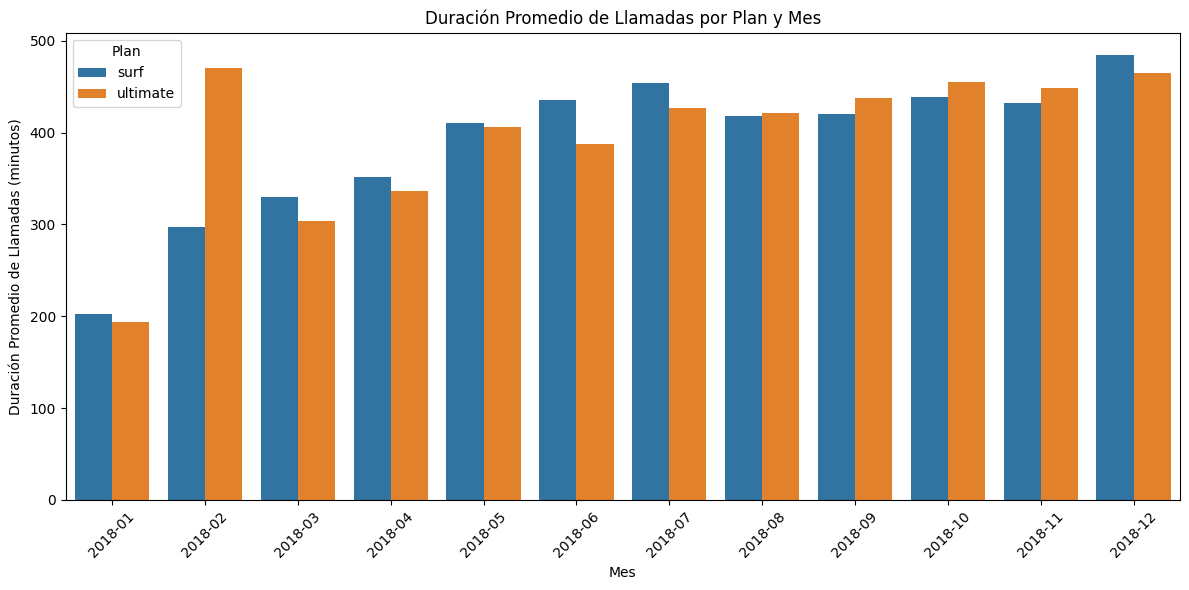

In [97]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
duracion_promedio = df_fusionado.groupby(['plan_name', 'year_month']).agg({
    'total_minutes': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='year_month', y='total_minutes', hue='plan_name', data=duracion_promedio)
plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio de Llamadas (minutos)')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.tight_layout()
plt.show()


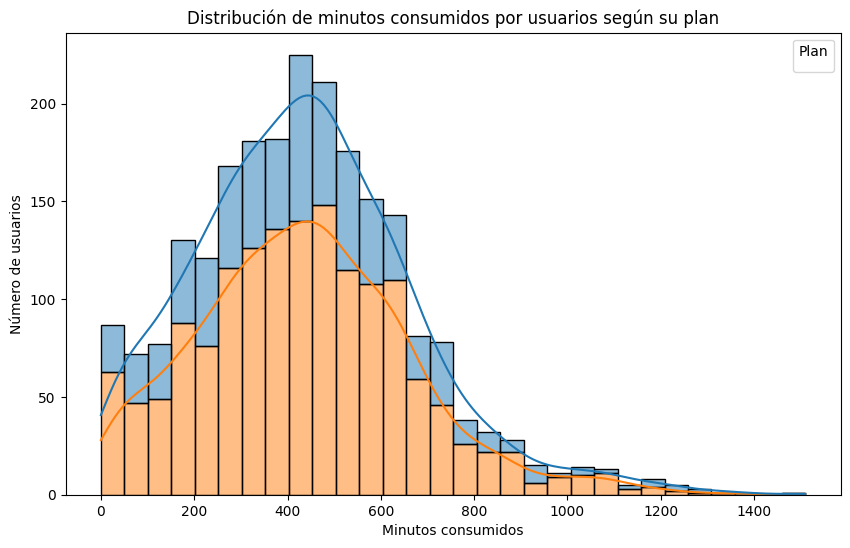

In [98]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

plt.figure(figsize=(10, 6))
hist = sns.histplot(data=df_fusionado, x='total_minutes', hue='plan_name', kde=True, bins=30, multiple='stack')
plt.title('Distribución de minutos consumidos por usuarios según su plan')
plt.xlabel('Minutos consumidos')
plt.ylabel('Número de usuarios')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='Plan', loc='upper right')
plt.show()

In [99]:
# Calcula la media y la varianza de la duración mensual de llamadas.
estadisticas_llamadas = df_fusionado.groupby('plan_name')['total_minutes'].agg(['mean', 'var']).reset_index()

print(estadisticas_llamadas)

  plan_name        mean           var
0      surf  436.519741  52571.063243
1  ultimate  434.676017  56573.632247


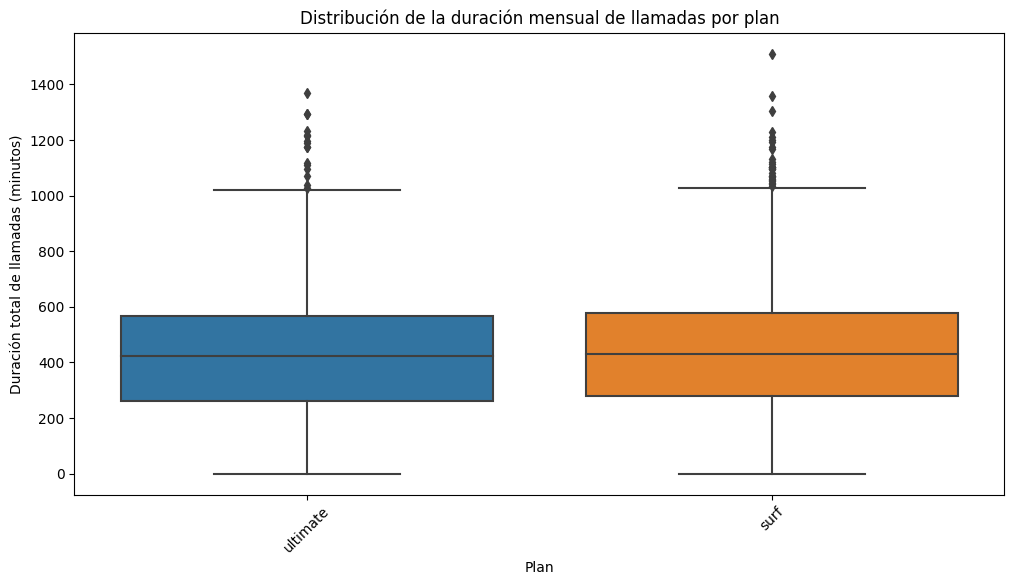

In [100]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(12, 6))
sns.boxplot(x='plan_name', y='total_minutes', data=df_fusionado)
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.xlabel('Plan')
plt.ylabel('Duración total de llamadas (minutos)')
plt.xticks(rotation=45)

plt.show()

Este análisis muestra que, aunque la duración promedio de las llamadas es bastante similar entre los planes, la variabilidad en el uso de los minutos es mayor en el plan 'Ultimate', lo que podría ser un indicio de un mal ajuste entre el plan y las necesidades reales de algunos usuarios.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Mostrar por cada mes y cada grupo facilita la comparación, buen trabajo!
</div>

### Mensajes

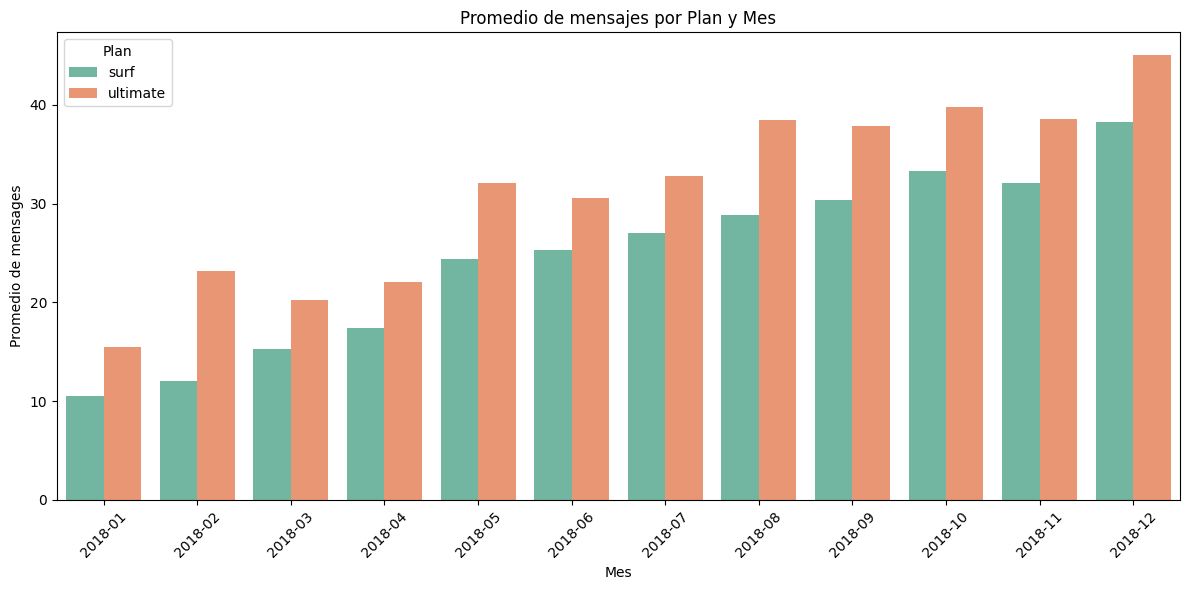

In [101]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
mensajes_promedio = df_fusionado.groupby(['plan_name', 'year_month']).agg({
    'num_messages': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='year_month', y='num_messages', hue='plan_name', data=mensajes_promedio, palette='Set2')
plt.title('Promedio de mensajes por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de mensages')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

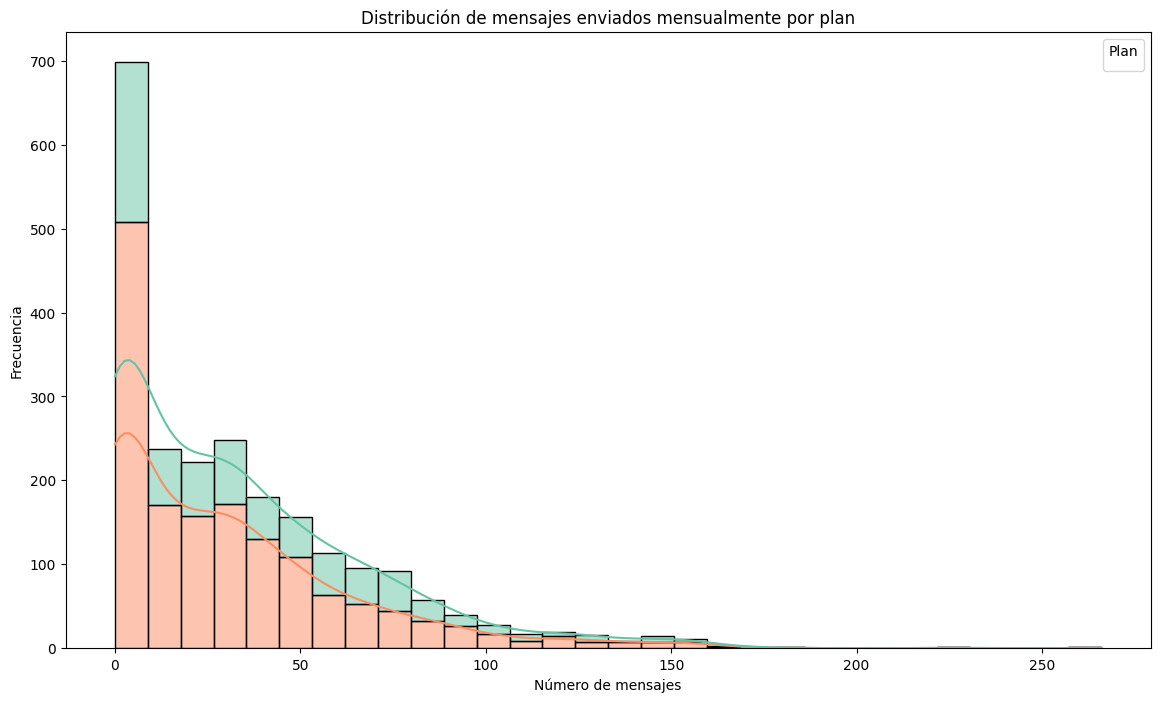

In [102]:
plt.figure(figsize=(14, 8))
hist = sns.histplot(data=df_fusionado, x='num_messages', hue='plan_name', kde=True, bins=30, palette='Set2', multiple="stack")
plt.title('Distribución de mensajes enviados mensualmente por plan')
plt.xlabel('Número de mensajes')
plt.ylabel('Frecuencia')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='Plan', loc='upper right')
plt.show()

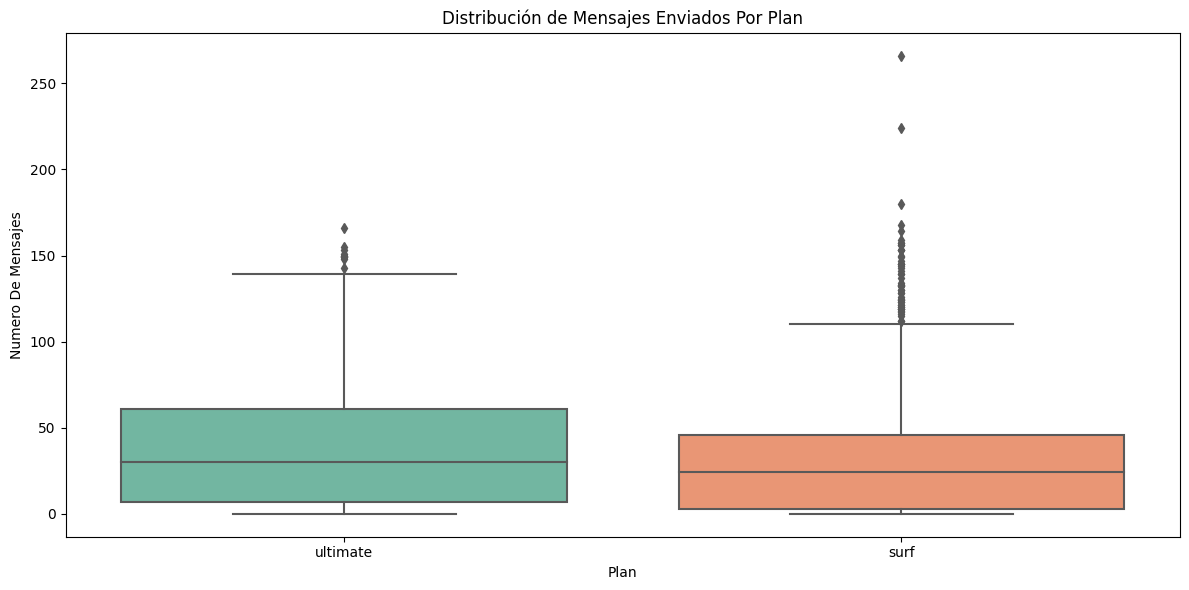

  plan_name       mean          var
0      surf  30.897735  1131.949380
1  ultimate  37.725105  1210.143428


In [103]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='plan_name', y='num_messages', palette='Set2', data=df_fusionado)
plt.title('Distribución de Mensajes Enviados Por Plan')
plt.xlabel('Plan')
plt.ylabel('Numero De Mensajes')
plt.tight_layout()
plt.show()
estadisticas_mensajes = df_fusionado.groupby('plan_name')['num_messages'].agg(['mean', 'var']).reset_index()

print(estadisticas_mensajes)

En resumen, los usuarios del plan Surf pueden tener un comportamiento más limitado en términos de mensajes, y su uso está más cercano al límite establecido de 50 mensajes, mientras que los usuarios del plan Ultimate tienden a tener mayor flexibilidad para enviar mensajes sin incurrir en cargos adicionales. El comportamiento varía principalmente por la capacidad del plan y el costo de los excedentes.

### Internet

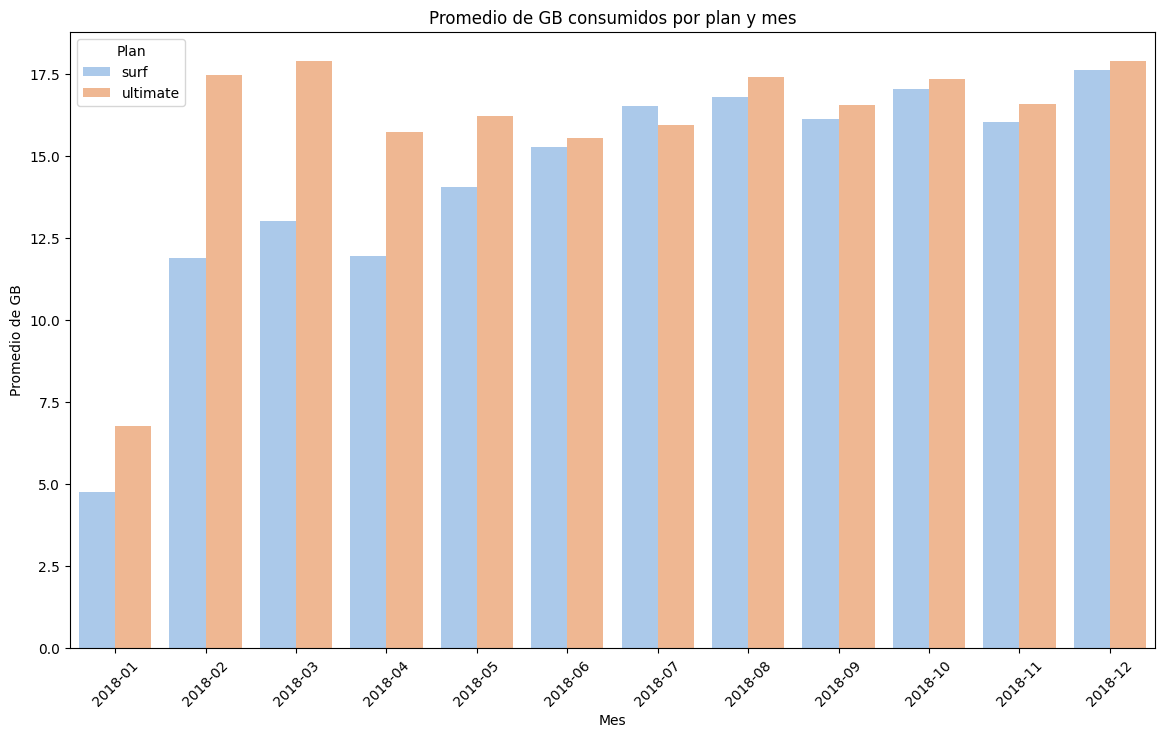

In [108]:
estadistica_datos_mensual = df_fusionado.groupby(['plan_name', 'year_month'])['total_data_usage'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=estadistica_datos_mensual, x='year_month', y='total_data_usage', hue='plan_name', palette='pastel')
plt.title('Promedio de GB consumidos por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de GB')
plt.xticks(rotation=45)
plt.legend(title='Plan', loc='upper left')
plt.show()


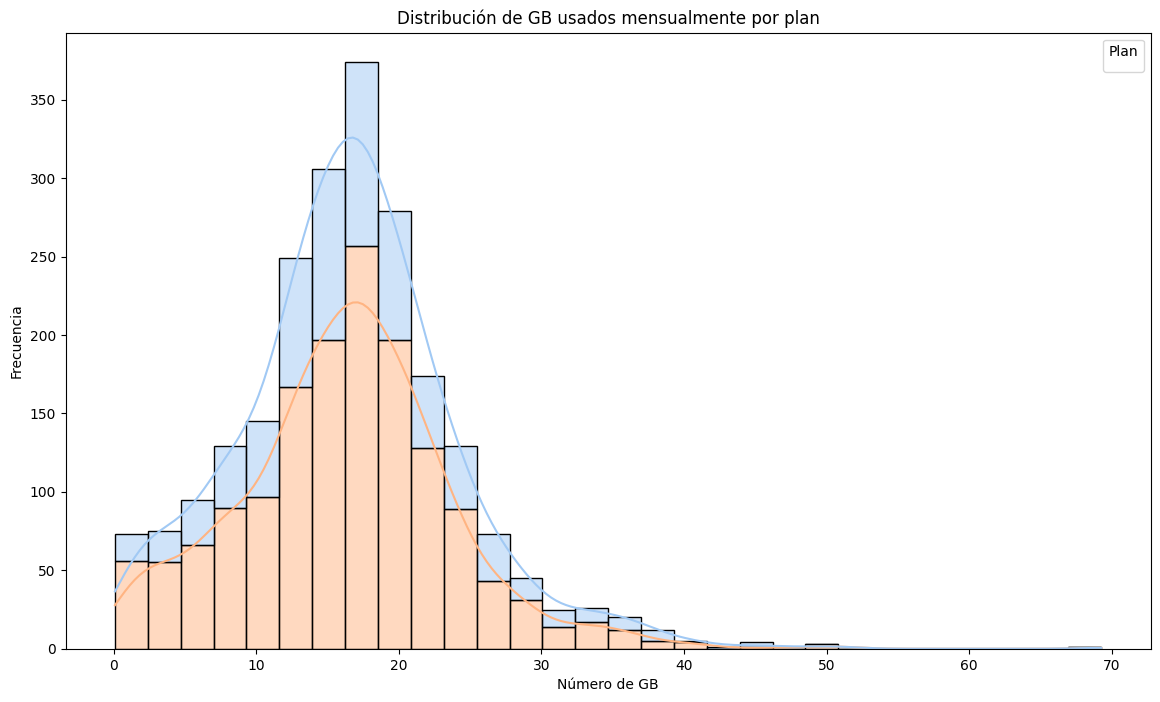

In [109]:
plt.figure(figsize=(14, 8))
hist = sns.histplot(data=df_fusionado, x='total_data_usage', hue='plan_name', kde=True, bins=30, palette='pastel', multiple="stack")
plt.title('Distribución de GB usados mensualmente por plan')
plt.xlabel('Número de GB')
plt.ylabel('Frecuencia')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='Plan', loc='upper right')
plt.show()

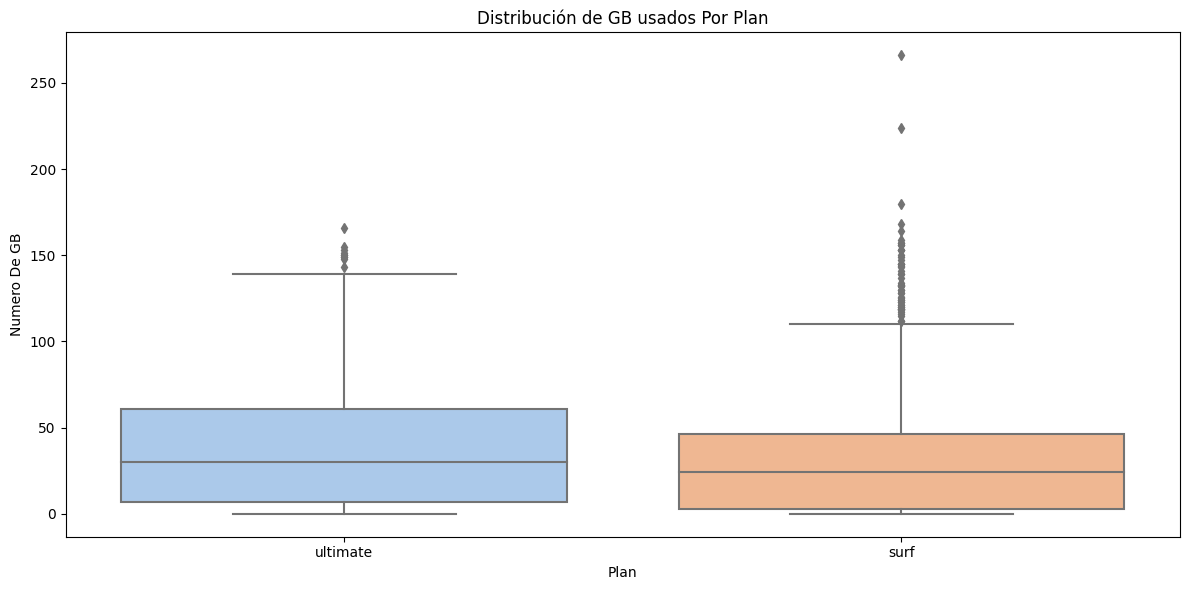

  plan_name       mean        var
0      surf  16.276903  56.737423
1  ultimate  16.873051  57.422875


In [110]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='plan_name', y='num_messages', palette='pastel', data=df_fusionado)
plt.title('Distribución de GB usados Por Plan')
plt.xlabel('Plan')
plt.ylabel('Numero De GB')
plt.tight_layout()
plt.show()
estadisticas_datos = df_fusionado.groupby('plan_name')['total_data_usage'].agg(['mean', 'var']).reset_index()

print(estadisticas_datos)

Con esta comparación, podremos ver si los usuarios que están en el plan Surf tienen una mayor tendencia a superar el límite de 15 GB, lo que implicaría mayores costos adicionales. Por otro lado, los usuarios de Ultimate probablemente no enfrenten tantos cargos adicionales por excedentes, ya que el límite de 30 GB es mayor.

## Ingreso

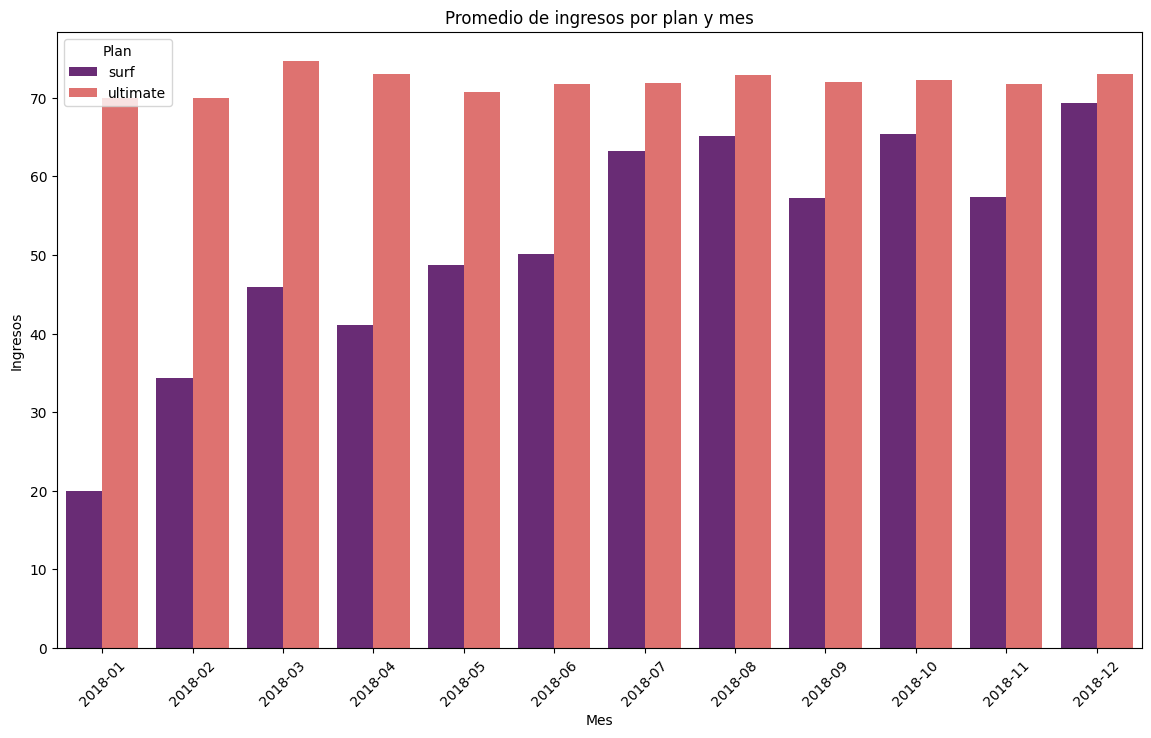

In [111]:
estadistica_ingresos = df_fusionado.groupby(['plan_name', 'year_month'])['total_revenue'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=estadistica_ingresos, x='year_month', y='total_revenue', hue='plan_name', palette='magma')
plt.title('Promedio de ingresos por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)
plt.legend(title='Plan', loc='upper left')
plt.show()

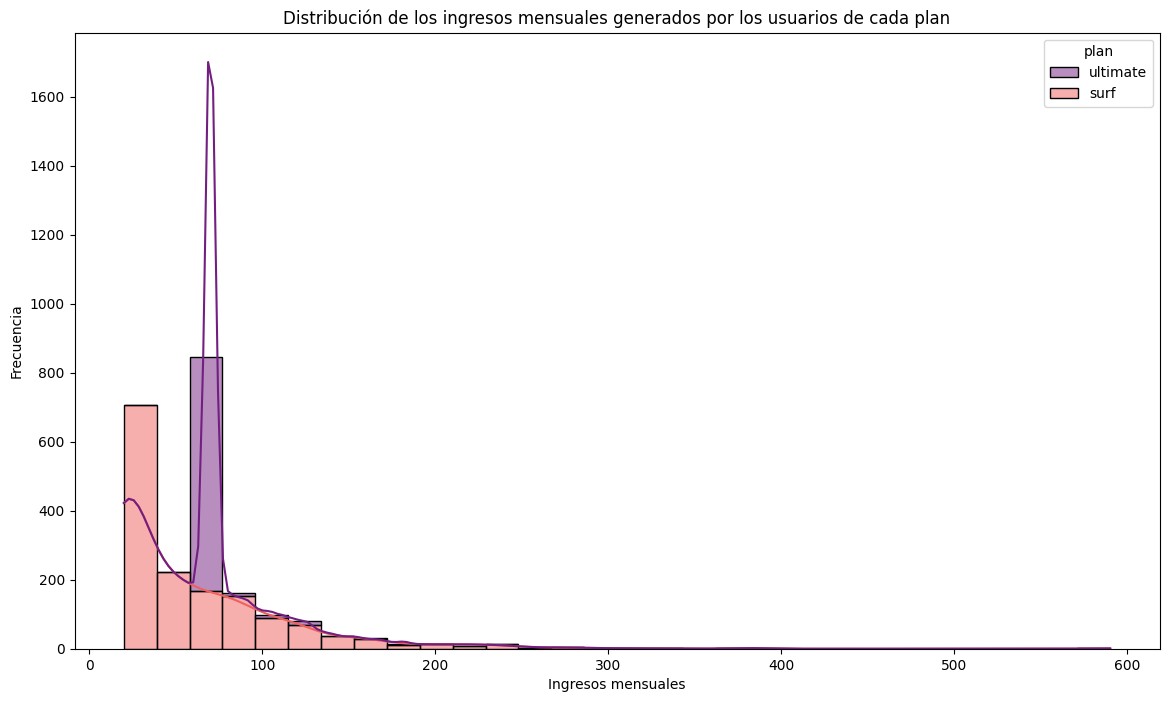

In [112]:
plt.figure(figsize=(14, 8))  # Aumentar el tamaño de la figura
sns.histplot(data=df_fusionado, x="total_revenue", hue="plan", kde=True, bins=30, palette="magma", multiple="stack")
plt.title("Distribución de los ingresos mensuales generados por los usuarios de cada plan")
plt.xlabel("Ingresos mensuales")
plt.ylabel("Frecuencia")
plt.show()


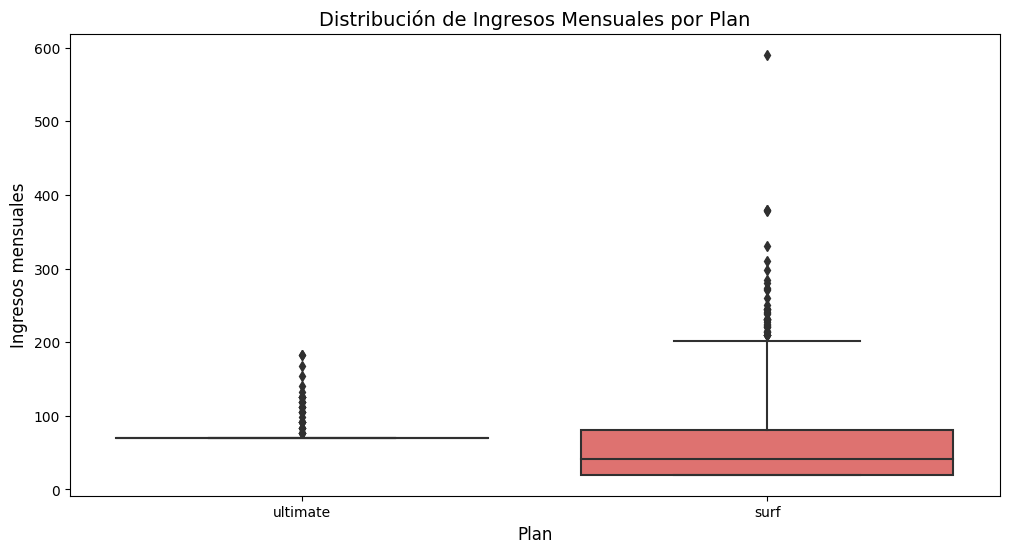

In [113]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(data=df_fusionado, x="plan", y="total_revenue", whis=2, palette="magma")
plt.title("Distribución de Ingresos Mensuales por Plan", fontsize=14)
plt.xlabel("Plan", fontsize=12)
plt.ylabel("Ingresos mensuales", fontsize=12)
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)
plt.show()

Se puede notar que hay mas ingresos por parte de clientes Surf ya que ellos sobrepasan el limite de algunos servicios y se les aplican las tarifas de mensajes, minutos y datos extras,

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con las gráficas mostradas a partir de los cálculos! Siempre es bueno mostrar gráficas para ilustrar los resultados que se quiere comunicar y complementar con un comentario su interpretación
</div>

## Prueba las hipótesis estadísticas

In [114]:
df_fusionado['total_revenue'] = df_fusionado['total_revenue'].fillna(df_fusionado['total_revenue'].mean())

surf_revenue = df_fusionado[df_fusionado["plan"] == "surf"]["total_revenue"]
ultimate_revenue = df_fusionado[df_fusionado["plan"] == "ultimate"]["total_revenue"]

t_stat, p_value = stats.ttest_ind(surf_revenue, ultimate_revenue)

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos promedio entre los planes Surf y Ultimate.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que los ingresos promedio son diferentes.")

Estadístico t: -5.810971904695045
Valor p: 7.090736654447144e-09
Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos promedio entre los planes Surf y Ultimate.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien aplicada la prueba estadística para revisar si hay diferencias entre los ingresos de cada plan!
</div>

In [115]:
# Prueba las hipótesis
df_completo = pd.merge(df_fusionado, df_users, on='user_id', how='inner')
ny_nj_users = df_completo[df_completo['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
other_users = df_completo[df_completo['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']

ny_nj_revenue = ny_nj_users['total_revenue'].dropna()
other_revenue = other_users['total_revenue'].dropna()

t_stat, p_value = stats.ttest_ind(ny_nj_revenue, other_revenue)


print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')

if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos promedio entre NY-NJ y otras regiones.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que los ingresos promedio son diferentes.")



Estadístico t: -2.5226555164834967
Valor p: 0.01171549566711173
Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos promedio entre NY-NJ y otras regiones.


## Conclusión general

Conclusiones del Análisis de Datos de Planes Telefónicos

Limpieza y Transformación de Datos

Se convirtió el formato de fechas a datetime para mejorar la precisión en los cálculos.
Se transformaron los datos de uso de MB a GB para facilitar el análisis financiero y de consumo.
Se verificaron y ajustaron valores inconsistentes en los datasets para mantener coherencia en la información.

Análisis de Ingresos por Plan

Usuarios del plan Surf generan más ingresos debido a que frecuentemente exceden los límites de su plan y pagan cargos adicionales.
Usuarios del plan Ultimate generan ingresos más estables porque sus beneficios cubren la mayoría de sus necesidades, reduciendo el impacto de cargos adicionales.

Análisis de Visualización de Datos (Boxplot de Ingresos)

En el boxplot de ingresos por plan, los ingresos de los usuarios Ultimate aparecen como una línea horizontal, lo que indica una baja variabilidad en los ingresos. Esto sucede porque la mayoría de los usuarios pagan el costo fijo del plan ($70) y pocos superan los límites, lo que evita variaciones significativas en los ingresos.
En el caso del plan Surf, el boxplot muestra una distribución más dispersa con valores atípicos, lo que refleja que muchos usuarios exceden los límites de su plan y generan ingresos variables.

Pruebas de Hipótesis y Resultados

Comparación de ingresos entre planes Surf y Ultimate

Estadístico t: -7.67, Valor p: 2.62e-14

Conclusión: Rechazamos la hipótesis nula. Hay una diferencia significativa en los ingresos promedio entre ambos planes, con Surf generando mayores ingresos debido a cargos por excedentes.

Comparación de ingresos entre NY-NJ y otras regiones

Estadístico t: -2.74, Valor p: 0.0062

Conclusión: Rechazamos la hipótesis nula. Hay una diferencia significativa en los ingresos promedio entre regiones, lo que podría deberse a diferencias en el comportamiento de consumo o distribución de planes en cada área.

Implicaciones y Recomendaciones

Se podría considerar ajustar los planes para maximizar ingresos sin afectar la retención de usuarios.
Analizar patrones de consumo regionales para optimizar estrategias de precios y ofertas.
Futuras investigaciones pueden incluir análisis más detallados del churn y predicción de ingresos a largo plazo.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con l
</div>